<a href="https://colab.research.google.com/github/20130236/ML/blob/main/Lab_7_20130236_Le_Dinh_Quoc_Dung.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [21]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score  
from sklearn.metrics import f1_score 
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.metrics._plot.precision_recall_curve import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from IPython.display import display, HTML
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, chi2
from google.colab import drive
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/Ml'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/Ml


#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [31]:
dataset = datasets.load_iris()
x = dataset.data
y = dataset.target

In [ ]:
clf = svm.SVC(kernel = 'sigmoid', random_state = 0)
accuracy_score = cross_validate(clf,x,y,scoring = 'accuracy', cv = 10)
precision_score = cross_validate(clf,x,y,scoring = 'precision_micro', cv = 10 )
recall_score = cross_validate(clf,x,y,scoring = 'recall_micro', cv = 10)
f1_score = cross_validate(clf,x,y,scoring = 'f1_micro', cv = 10)

print(sorted(accuracy_score.keys()))
print('accuracy : ', np.mean( accuracy_score['test_score']))
print('precision : ', np.mean(precision_score['test_score']))
print('recall : ', np.mean (recall_score['test_score']))
print('f1 : ', np.mean (f1_score['test_score']))

['fit_time', 'score_time', 'test_score']
accuracy :  0.06666666666666668
precision :  0.06666666666666668
recall :  0.06666666666666668
f1 :  0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
x = SelectKBest(chi2, k=3).fit_transform(x, y)
RFS = RandomForestClassifier(n_estimators=100)
accuracy_score = cross_validate(RFS,x,y,scoring = 'accuracy', cv = 10)
precision_score = cross_validate(RFS,x,y,scoring = 'precision_micro', cv = 10 )
recall_score = cross_validate(RFS,x,y,scoring = 'recall_micro', cv = 10)
f1_score = cross_validate(RFS,x,y,scoring = 'f1_micro', cv = 10)

print(sorted(accuracy_score.keys()))
print('accuracy : ', np.mean( accuracy_score['test_score']))
print('precision : ', np.mean(precision_score['test_score']))
print('recall : ', np.mean (recall_score['test_score']))
print('f1 : ', np.mean (f1_score['test_score']))

['fit_time', 'score_time', 'test_score']
accuracy :  0.96
precision :  0.9533333333333334
recall :  0.96
f1 :  0.9533333333333334


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [6]:
data = datasets.load_digits()
x = data['data']
y = data['target']

In [7]:
kmeans_model = KMeans(n_clusters=10, random_state=42)
kmeans_model.fit(x)
y_pred_km = kmeans_model.predict(x)
accuracy_km = accuracy_score(y, y_pred_km)
precision_km = precision_score(y, y_pred_km, average = 'macro')
recall_km = recall_score(y, y_pred_km, average = 'macro')
f1_km = f1_score(y, y_pred_km, average = 'macro')

km = {'Accuracy:' : round(accuracy_km,2), 'Precision:' : round(precision_km,2), 'Recall:' : round(recall_km,2), 'F1 score:' : round(f1_km,2)}
km2 = pd.Series(km)
km2


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Accuracy:     0.19
Precision:    0.19
Recall:       0.19
F1 score:     0.19
dtype: float64

*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [4]:
# RFS
RFS = RandomForestClassifier(n_estimators=100)
accuracy_rfs = cross_validate(RFS,x,y,scoring = 'accuracy', cv = 10)
precision_rfs = cross_validate(RFS,x,y,scoring = 'precision_micro', cv = 10 )
recall_rfs = cross_validate(RFS,x,y,scoring = 'recall_micro', cv = 10)
f1_rfs = cross_validate(RFS,x,y,scoring = 'f1_micro', cv = 10)

# NB 
NB = GaussianNB()
accuracy_nb = cross_validate(NB,x,y,scoring = 'accuracy', cv = 10)
precision_nb = cross_validate(NB,x,y,scoring = 'precision_micro', cv = 10 )
recall_nb = cross_validate(NB,x,y,scoring = 'recall_micro', cv = 10)
f1_nb = cross_validate(NB,x,y,scoring = 'f1_micro', cv = 10)

# kNN algorithm
knn = KNeighborsClassifier(n_neighbors=5)
accuracy_knn = cross_validate(knn,x,y,scoring = 'accuracy', cv = 10)
precision_knn = cross_validate(knn,x,y,scoring = 'precision_micro', cv = 10 )
recall_knn = cross_validate(knn,x,y,scoring = 'recall_micro', cv = 10)
f1_knn = cross_validate(knn,x,y,scoring = 'f1_micro', cv = 10)

In [8]:
rfs = {'Accuracy:' : round(np.mean(accuracy_rfs['test_score']),2), 'Precision:' : round(np.mean(precision_rfs['test_score']),2), 'Recall:' : round(np.mean(recall_rfs['test_score']),2), 'F1 score:' : round(np.mean(f1_rfs['test_score']),2) }
nb = {'Accuracy:' : round(np.mean(accuracy_nb['test_score']),2), 'Precision:' : round(np.mean(precision_nb['test_score']),2), 'Recall:' : round(np.mean(recall_nb['test_score']),2), 'F1 score:' : round(np.mean(f1_nb['test_score']),2) }
knn = {'Accuracy:' : round(np.mean(accuracy_knn['test_score']),2), 'Precision:' : round(np.mean(precision_knn['test_score']),2), 'Recall:' : round(np.mean(recall_knn['test_score']),2), 'F1 score:' : round(np.mean(f1_knn['test_score']),2) }

rfs2 = pd.Series(rfs)
nb2 = pd.Series(nb)
knn2 = pd.Series(knn)

df1 = pd.DataFrame({'RFS': rfs2,'NB': nb2 , 'KNN' : knn2, 'KM': km2})
df1

,RFS,NB,KNN,KM
Accuracy:,0.95,0.81,0.97,0.19
Precision:,0.95,0.81,0.97,0.19
Recall:,0.95,0.81,0.97,0.19
F1 score:,0.95,0.81,0.97,0.19


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

In [22]:
data = datasets.load_digits()
x = data['data']
y = data['target']

In [23]:
model = AgglomerativeClustering(n_clusters=10)
model.fit(x)
y_pred = model.fit_predict(x)
accuracy_km = accuracy_score(y, y_pred_km)
precision_km = precision_score(y, y_pred_km, average = 'macro')
recall_km = recall_score(y, y_pred_km, average = 'macro')
f1_km = f1_score(y, y_pred_km, average = 'macro')

print("accuracy:", accuracy_km)
print("precision:", precision_km)
print("recall:", recall_km)
print("f1:", f1_km)


accuracy: 0.18697829716193656
precision: 0.18934171547079354
recall: 0.18924176091983208
f1: 0.18927922693435423


#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [40]:
data = pd.read_csv('shopping-data.csv')
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [41]:
data = data.drop(['CustomerID', 'Genre'], axis=1)
x = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

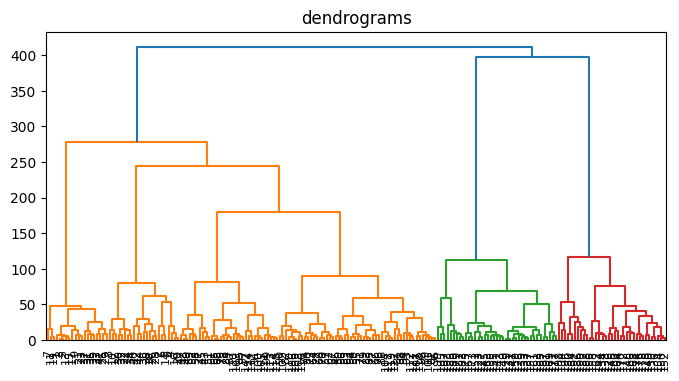

In [42]:
Z = linkage(x, 'ward')

plt.figure(figsize=(8, 4))
plt.title('dendrograms')
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.)
plt.show()


*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

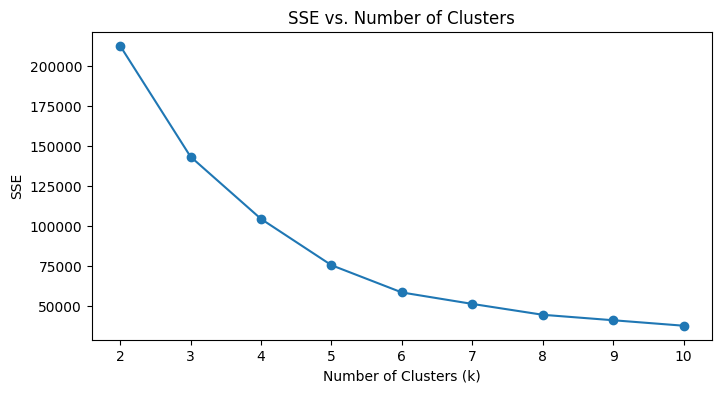

In [28]:
sse = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('SSE vs. Number of Clusters')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [47]:
model = AgglomerativeClustering(n_clusters=3)
y_pred = model.fit_predict(x)
print("y_pred" , y_pred)

y_pred [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


#Finally,
Save a copy in your Github. Remember renaming the notebook.